In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [3]:
assessor_multitask = pd.read_csv('../artifacts/csv-results/scaling-0sh/128b.csv')
assessor_task_spec = pd.read_csv('../artifacts/csv-results/task-specific-assessors.csv')
tasksyst_bigg_asss = pd.read_csv('../artifacts/csv-results/scaling-0sh/128b.csv')
# tasksyst_bigg_task
tasksyst_bert_asss = pd.read_csv('../artifacts/csv-results/task-specific-finetuning/results-small.csv') # Only with fixed amount of choices
# tasksyst_bert_task

# Which two are the most interesting to plot?
# Axis 1: tasksyst_bert_asss, tasksyst_bert_task
# Axis 2: assessor_multitask, assessor_task_spec




Total number of tasks: 119, with 26 having finetuned BERT performance available.
26 26


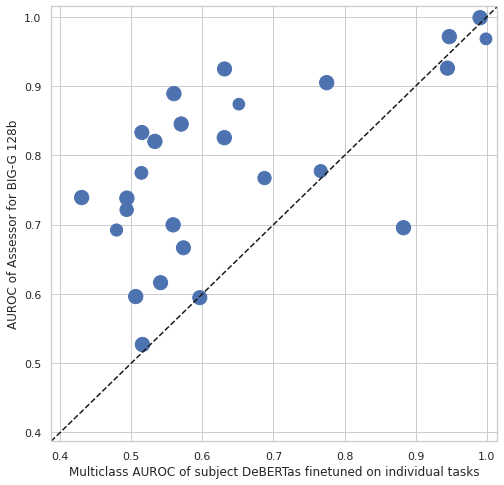

Between assessor and task-specific finetuning:
Pearson correlation: (0.6288834704850852, 0.0005791642112810268)
Spearman correlation: SpearmanrResult(correlation=0.606153846153846, pvalue=0.0010299010849706886)
Between assessor and BIG-G:
Pearson correlation: (0.38505648079833626, 0.05207689192636435)
Spearman correlation: SpearmanrResult(correlation=0.39555555555555555, pvalue=0.04548129950045341)
Between task-specific finetuning and BIG-G:
Pearson correlation: (0.3833917423598526, 0.053188092015045)
Spearman correlation: SpearmanrResult(correlation=0.2027350427350427, pvalue=0.3205766401534719)


In [4]:


# TODO: Also see correlation between BIG-bench task performance and assessor performance

# Note: We have to make a choice here for task-system.
# The alternative is averaging, but let's not.
# TODO, can we also let it predict itself?
asss_df = pd.read_csv('../artifacts/csv-results/scaling-0sh-small/128b.csv')
asss_df.rename(columns={'Unnamed: 0': 'task'}, inplace=True)
task_df = pd.read_csv('../artifacts/csv-results/task-specific-finetuning/results-small.csv')
task_df = task_df[task_df['test_roc_auc'] != 0]
task_df = task_df[task_df['count'] > 100]
task_df.rename(columns={'Unnamed: 0': 'task'}, inplace=True)
tsa_df = pd.read_csv('../artifacts/csv-results/task-specific-assessors.csv')
tsa_df.rename(columns={'Unnamed: 0': 'task'}, inplace=True)

print(f"Total number of tasks: {len(asss_df)}, with {len(task_df)} having finetuned BERT performance available.")

def correlation_plot(task_performance, asss_performance, metric: str, counts=None):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8, 8))
    # Set scatter size based on count
    if counts is not None:
        plt.scatter(task_performance, asss_performance, s=counts)
    else:
        plt.scatter(task_performance, asss_performance)
    plt.xlabel(f'Multiclass AUROC of subject DeBERTas finetuned on individual tasks')
    plt.ylabel(f'AUROC of Assessor for BIG-G 128b')
    # plt.title(f'Correlation of AUROCs {metric}, each dot being a task')

    # Minimum of both lists
    min_val = min(min(task_performance), min(asss_performance))
    plt.xlim(min_val - 0.1*min_val, 1.015)
    plt.ylim(min_val - 0.1*min_val, 1.015)

    # Plot diagonal line
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls='--', c='k')
    plt.show()
    

filtered = asss_df.merge(task_df, on='task', suffixes=('_asss', '_task'))
print(len(filtered), len(task_df))
assert len(filtered) == len(task_df)
assert (filtered.count_asss == filtered.count_task).all()
correlation_plot(
    filtered['test_roc_auc_task'],
    filtered['test_roc_auc_asss'],
    metric='AUROC',
    counts=filtered['count_task'] # Should be equal to filtered['count_asss']
)
# correlation_plot(filtered['test_accuracy_asss'], filtered['test_accuracy_task'], metric='accuracy')

# Pearson correlation
print(f"Between assessor and task-specific finetuning:")
print(f"Pearson correlation: {pearsonr(filtered['test_roc_auc_asss'], filtered['test_roc_auc_task'])}")
print(f"Spearman correlation: {spearmanr(filtered['test_roc_auc_asss'], filtered['test_roc_auc_task'])}")

# correlation_plot(
#     filtered['test_conf_normalized_roc_auc'], # BIG-G task performance
#     filtered['test_roc_auc_asss'],
#     metric='AUROC',
#     counts=filtered['count_task'] # Should be equal to filtered['count_asss']
# )

# Correlation between BIG-G and assessor
print(f"Between assessor and BIG-G:")
print(f"Pearson correlation: {pearsonr(filtered['test_roc_auc_asss'], filtered['test_conf_normalized_roc_auc'])}")
print(f"Spearman correlation: {spearmanr(filtered['test_roc_auc_asss'], filtered['test_conf_normalized_roc_auc'])}")

# Correlation between BIG-G and task-specific finetuning
print(f"Between task-specific finetuning and BIG-G:")
print(f"Pearson correlation: {pearsonr(filtered['test_roc_auc_task'], filtered['test_conf_normalized_roc_auc'])}")
print(f"Spearman correlation: {spearmanr(filtered['test_roc_auc_task'], filtered['test_conf_normalized_roc_auc'])}")

Total number of tasks: 118, with 26 having finetuned BERT performance available.


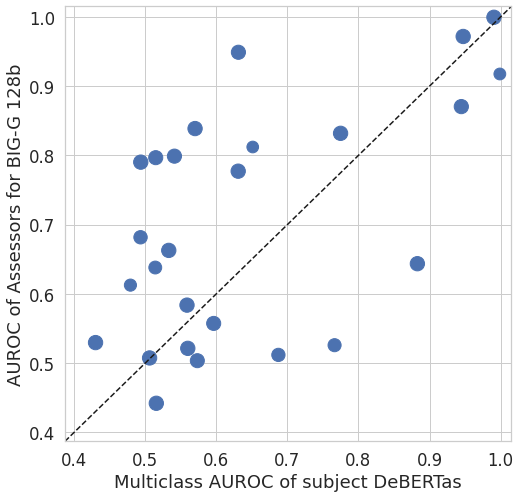

Between assessor and task-specific finetuning:
Pearson correlation: (0.5619580848190354, 0.0028109925263504116)
Spearman correlation: SpearmanrResult(correlation=0.481025641025641, pvalue=0.012857018509186312)


In [15]:


# TODO: Also see correlation between BIG-bench task performance and assessor performance

# Note: We have to make a choice here for task-system.
# The alternative is averaging, but let's not.
# TODO, can we also let it predict itself?
# asss_df = pd.read_csv('../artifacts/csv-results/scaling-0sh-small/128b.csv')
# asss_df.rename(columns={'Unnamed: 0': 'task'}, inplace=True)
task_df = pd.read_csv('../artifacts/csv-results/task-specific-finetuning/results-small.csv')
task_df = task_df[task_df['test_roc_auc'] != 0]
task_df = task_df[task_df['count'] > 100]
task_df.rename(columns={'Unnamed: 0': 'task'}, inplace=True)
tsa_df = pd.read_csv('../artifacts/csv-results/task-specific-assessors.csv')
tsa_df.rename(columns={'Unnamed: 0': 'task'}, inplace=True)

print(f"Total number of tasks: {len(tsa_df)}, with {len(task_df)} having finetuned BERT performance available.")

def correlation_plot(task_performance, asss_performance, metric: str, counts=None):
    sns.set_theme(style="whitegrid", font_scale=1.5)
    plt.figure(figsize=(8, 8))
    # Set scatter size based on count
    if counts is not None:
        plt.scatter(task_performance, asss_performance, s=counts)
    else:
        plt.scatter(task_performance, asss_performance)
    plt.xlabel(f'Multiclass AUROC of subject DeBERTas')
    plt.ylabel(f'AUROC of Assessors for BIG-G 128b')
    # plt.title(f'Correlation of AUROCs {metric}, each dot being a task')

    # Minimum of both lists
    min_val = min(min(task_performance), min(asss_performance))
    plt.xlim(min_val - 0.1*min_val, 1.015)
    plt.ylim(min_val - 0.1*min_val, 1.015)


    # Plot diagonal line
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls='--', c='k')
    plt.savefig(f'../artifacts/plots/correlation.svg', bbox_inches='tight', format='svg')
    plt.show()


filtered = tsa_df.merge(task_df, on='task', suffixes=('_tsa', '_task'))
assert len(filtered) == len(task_df)
assert (filtered.count_tsa == filtered.count_task).all()
correlation_plot(
    filtered['test_roc_auc_task'],
    filtered['test_roc_auc_tsa'],
    metric='AUROC',
    counts=filtered['count_task'] # Should be equal to filtered['count_asss']
)

# Pearson correlation
print(f"Between assessor and task-specific finetuning:")
print(f"Pearson correlation: {pearsonr(filtered['test_roc_auc_tsa'], filtered['test_roc_auc_task'])}")
print(f"Spearman correlation: {spearmanr(filtered['test_roc_auc_tsa'], filtered['test_roc_auc_task'])}")
